# ODS NLP Cource: Seminar 03 - Text Vectorization

Что почитать:
- [Яндекс учебник](https://education.yandex.ru/handbook/ml/article/linear-models)
- [ШАД-конспект по Classic ML](https://t.me/dimension_ai/164)

# [1] Разреженные эмбеддинги

## Bag of Words

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc = OneHotEncoder()
enc.fit(X)
print(*enc.categories_)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

['female' 'male'] ['from Europe' 'from US'] ['uses Firefox' 'uses Safari']


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    )

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [ ]:
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
tokens = [simple_preprocess(line) for line in corpus]
vocab = Dictionary(tokens)
docs = [vocab.doc2bow(sent) for sent in tokens]

pd.DataFrame(
    [pd.Series(dict(doc)) for doc in docs]
    ).rename(columns=vocab).fillna(0).astype(int)

,document,first,is,the,this,second,and,one,third
0,1,1,1,1,1,0,0,0,0
1,2,0,1,1,1,1,0,0,0
2,0,0,1,1,1,0,1,1,1
3,1,1,1,1,1,0,0,0,0


## TF-iDF

In [ ]:
import numpy as np
from sklearn.preprocessing import TargetEncoder

X, y = np.array(
    [("dog", 0)] * 20 +
    [("dog", 1)] * 5 +
    [("cat", 0)] * 15 +
    [("cat", 1)] * 10 +
    [("snake", 0)] * 5 +
    [("snake", 1)] * 20).T

enc = TargetEncoder()
enc.fit(X[:, None], y.astype(int))

enc.transform([['dog'], ['cat'], ['cat'], ['snake']])

array([[0.20668524],
       [0.40247593],
       [0.40247593],
       [0.79164345]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    ).round(2)

,and,document,first,is,one,second,the,third,this
0,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38
1,0.00,0.69,0.00,0.28,0.00,0.54,0.28,0.00,0.28
2,0.51,0.00,0.00,0.27,0.51,0.00,0.27,0.51,0.27
3,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())])
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = pipe.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=sorted(pipe['count'].vocabulary_)
    ).round(2)

,and,document,first,is,one,second,the,third,this
0,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38
1,0.00,0.69,0.00,0.28,0.00,0.54,0.28,0.00,0.28
2,0.51,0.00,0.00,0.27,0.51,0.00,0.27,0.51,0.27
3,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38


In [ ]:
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
tokens = [simple_preprocess(line) for line in corpus]
tfidf = TfidfModel(dictionary=Dictionary(tokens), smartirs='ntc')
docs = [vocab.doc2bow(sent) for sent in tokens]

pd.DataFrame(
    [pd.Series(dict(doc)) for doc in tfidf[docs]]
    ).rename(columns=tfidf.id2word).fillna(0).round(2)

,document,first,is,the,this,second,and,one,third
0,0.46,0.82,0.20,0.20,0.20,0.00,0.00,0.00,0.00
1,0.53,0.00,0.11,0.11,0.11,0.83,0.00,0.00,0.00
2,0.00,0.00,0.08,0.08,0.08,0.00,0.57,0.57,0.57
3,0.46,0.82,0.20,0.20,0.20,0.00,0.00,0.00,0.00


# [2] Плотные эмбеддинги

## Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

dataset = api.load("text8")

# Train Word2Vec model
model = Word2Vec(dataset)

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
wv = model.wv

In [ ]:
wv.most_similar('good')[:3]

[('bad', 0.7387952208518982),
 ('poor', 0.6037652492523193),
 ('courage', 0.5789139270782471)]

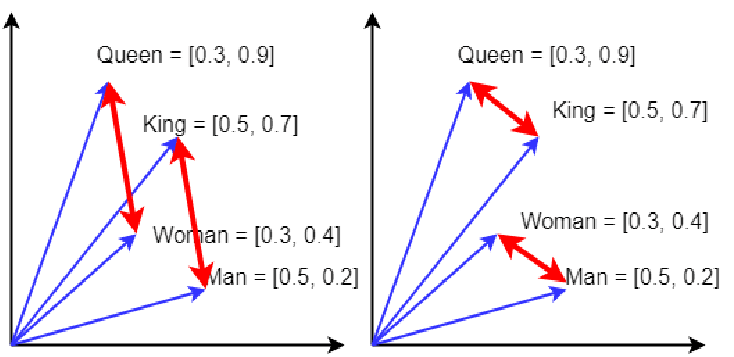

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.6626657843589783),
 ('empress', 0.6326138377189636),
 ('throne', 0.6271221041679382)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.7746025919914246),
 ('queen', 0.6626657843589783),
 ('empress', 0.6326138377189636)]

In [ ]:
wv.similarity('ok', 'yes')

0.40530095

## GloVe

In [ ]:
import gensim.downloader as api

glove = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
wv = glove

In [ ]:
wv.most_similar('good')[:3]

[('better', 0.9284391403198242),
 ('really', 0.9220623970031738),
 ('always', 0.9165270924568176)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.8854023814201355),
 ('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886)]

In [ ]:
wv.similarity('ok', 'yes')

0.79652935

## FastText

In [ ]:
%pip install -q compress-fasttext

  Preparing metadata (setup.py) ... done


In [ ]:
import compress_fasttext

fastt = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.4/cc.en.300.compressed.bin'
)

In [ ]:
wv = fastt

In [ ]:
wv.most_similar('good')[:3]

[('great', 0.7217045237532101),
 ('bad', 0.6990835063618114),
 ('decent', 0.691777177131285)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.6693863114450961),
 ('princess', 0.5261241490633126),
 ('Queen', 0.5141801336154289)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.7533272662127098),
 ('queen', 0.6693863114450961),
 ('princess', 0.5261241490633126)]

In [ ]:
wv.similarity('ok', 'yes')

0.5359969098653932

In [ ]:
import compress_fasttext

wv_ru = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)
wv_ru.most_similar('котенок')[:3]

[('кот', 0.73910242544411),
 ('пес', 0.738830100262397),
 ('малыш', 0.7280327473055335)]

# [3] Классикация текста

### Обработка датасета

In [ ]:
# Cоберём корпус в DataFrame
import nltk
from pathlib import Path
import pandas as pd

nltk.download("movie_reviews", download_dir='movie_reviews', quiet=True)
corpus_list = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([{'text': path.read_text("utf-8"), 'label': path.parent.name} for path in corpus_list])
df.head()

,text,label
0,the main problem with martin lawrence's pet pr...,neg
1,an experience like baby geniuses can have cert...,neg
2,'traffic violation' dr . daniel's review of u-...,neg
3,one of the most blatantly obvious signs that o...,neg
4,"if you've seen the trailers or commercials , i...",neg


In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
df['text'].head().apply(simple_preprocess)

,text
0,"[the, main, problem, with, martin, lawrence, p..."
1,"[an, experience, like, baby, geniuses, can, ha..."
2,"[traffic, violation, dr, daniel, review, of, t..."
3,"[one, of, the, most, blatantly, obvious, signs..."
4,"[if, you, ve, seen, the, trailers, or, commerc..."


In [ ]:
# Токенезируем тексты
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download(['punkt', 'stopwords', 'omw-1.4', 'wordnet', 'extended_omw'], quiet=True)
wnl = WordNetLemmatizer()
wn.add_exomw()

def nltk_lemmatize(word):
    lemma = min((wnl.lemmatize(word.lower(), pos) for pos in 'nvars'),  key=lambda x: len(x) - (x!=word))
    morph = min((m if (m:=wn.morphy(lemma, pos)) else lemma for pos in 'nvars'), key=lambda x: len(x) - (x!=lemma))
    return morph

# stop_words = stopwords.words('english')
stop_words = []

# tokenize = word_tokenize
# tokenize = RegexpTokenizer(r'\w+').tokenize
tokenize = simple_preprocess

# normalize = SnowballStemmer("english").stem
normalize = nltk_lemmatize

def text_preproc(text):
    return ' '.join([normalize(w) for w in tokenize(text) if w not in stop_words])


df['target'] = (df['label'] == 'pos') + 0
df['tokens'] = df['text'].apply(text_preproc)
df.head()

,text,label,target,tokens
0,the main problem with martin lawrence's pet pr...,neg,0,the main problem with martin lawrence pet proj...
1,an experience like baby geniuses can have cert...,neg,0,an experience like baby genius can have certai...
2,'traffic violation' dr . daniel's review of u-...,neg,0,traffic violation dr daniel review of turn dr ...
3,one of the most blatantly obvious signs that o...,neg,0,one of the most blatantly obvious sign that of...
4,"if you've seen the trailers or commercials , i...",neg,0,if you ve see the trailer or commercial it rat...


In [ ]:
# Векторизуем токены
import numpy as np

def get_vectorizer(wv_model):
    def vectorizer(sent: list[str]):
        return np.sum([wv_model[w] for w in sent if w in wv_model.key_to_index], axis=0)
    return vectorizer

df['glove'] = df['tokens'].apply(get_vectorizer(glove))
df['fastt'] = df['tokens'].apply(get_vectorizer(fastt))
df.head()

,text,label,target,tokens,glove,fasttext
0,the main problem with martin lawrence's pet pr...,neg,0,the main problem with martin lawrence pet proj...,"[-190.27773, 1786.5176, 1509.5852, 1588.554, 7...","[142.57131128396202, -945.6217714718896, -335...."
1,an experience like baby geniuses can have cert...,neg,0,an experience like baby genius can have certai...,"[-189.49445, 2133.7708, 1822.4429, 1898.7006, ...","[158.42569377204464, -1135.4839258915115, -400..."
2,'traffic violation' dr . daniel's review of u-...,neg,0,traffic violation dr daniel review of turn dr ...,"[-389.67065, 3659.4988, 2875.7388, 3191.1592, ...","[337.77468611513467, -1973.5695936992613, -607..."
3,one of the most blatantly obvious signs that o...,neg,0,one of the most blatantly obvious sign that of...,"[-301.50525, 2878.0244, 2351.0557, 2548.858, 1...","[230.0584134256719, -1550.6471948335877, -516...."
4,"if you've seen the trailers or commercials , i...",neg,0,if you ve see the trailer or commercial it rat...,"[-77.58013, 926.0612, 759.92554, 799.85486, 35...","[70.62389016497943, -495.25679366618596, -159...."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit(df['tokens'])

In [ ]:
# Векторизуем токены
import numpy as np

def get_vectorizer(wv_model, tfidf=None):
    vocab = pd.DataFrame({'wv': wv_model.key_to_index})
    vocab['idf'] = tfidf.vocabulary_ if tfidf else 1
    vocab = vocab.dropna().astype(int)
    weights = np.ones(len(tokens))
    def vectorizer(sent: list[str], ):
        tokens = [w for w in sent.split() if w in vocab.index]
        weights = tfidf.transform([sent])[0, vocab['idf'][tokens]].toarray() * 10
        result = np.sum((wv_model[tokens].T * weights).T, axis=0)
        return result
    return vectorizer
df['glove_tfidf'] = df['tokens'].apply(get_vectorizer(glove, tfidf))
df['fastt_tfidf'] = df['tokens'].apply(get_vectorizer(fastt, tfidf))

### Обучение модели

[Документация по моделям sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [ ]:
from sklearn.model_selection import train_test_split

# Разделим на Train и Test
train_index, test_index = train_test_split(df.index, random_state=42)

# выберем колонку с векторами
vectors = 'glove'
vectors = 'glove_tfidf'
# vectors = 'fastt'
vectors = 'fastt_tfidf'

# подготовим
X_train = np.vstack(df.loc[train_index, vectors].values)
X_test = np.vstack(df.loc[test_index, vectors].values)
y_train = df.loc[train_index, 'target'].values
y_test = df.loc[test_index, 'target'].values

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.85
test acc:  0.70


In [ ]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.83
test acc:  0.72


In [ ]:
from sklearn.svm import SVC, NuSVC

clf = SVC().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.69
test acc:  0.58


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.70


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.96
test acc:  0.64


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       274
           1       0.59      0.67      0.63       226

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500

